## First contact with our dataset

This is just to get a first view with the train data via some very basic pandas tools.

### First the libraries we're gonna use

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
#Very basic info with pandas

data = pd.read_csv("../data/claims_test.csv")
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135603 entries, 0 to 135602
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       135603 non-null  int64  
 1   ClaimNb     135603 non-null  int64  
 2   Exposure    135603 non-null  float64
 3   Area        135603 non-null  object 
 4   VehPower    135603 non-null  int64  
 5   VehAge      135603 non-null  int64  
 6   DrivAge     135603 non-null  int64  
 7   BonusMalus  135603 non-null  int64  
 8   VehBrand    135603 non-null  object 
 9   VehGas      135603 non-null  object 
 10  Density     135603 non-null  int64  
 11  Region      135603 non-null  object 
dtypes: float64(1), int64(7), object(4)
memory usage: 12.4+ MB


,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,1.356030e+05,135603.000000,135603.000000,135603.000000,135603.000000,135603.000000,135603.000000,135603.000000
mean,2.616244e+06,0.053745,0.528391,6.460034,7.038251,45.482954,59.761325,1777.407358
std,1.641672e+06,0.245373,0.364357,2.052504,5.687814,14.145517,15.626057,3931.192004
min,1.000000e+01,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.155984e+06,0.000000,0.170000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.271079e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,391.000000
75%,4.045092e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1622.000000
max,6.114327e+06,16.000000,1.900000,15.000000,100.000000,100.000000,190.000000,27000.000000


In [4]:
data.isnull().sum() #we check how many missing values are there in our dataset

IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64

In [5]:
data.describe(include='all') #some more info on the data a bit more in depth

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
count,1.356030e+05,135603.000000,135603.000000,135603,135603.000000,135603.000000,135603.000000,135603.000000,135603,135603,135603.000000,135603
unique,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,11,2,NaN,22
top,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,B12,Regular,NaN,R24
freq,NaN,NaN,NaN,38593,NaN,NaN,NaN,NaN,33193,69154,NaN,32099
mean,2.616244e+06,0.053745,0.528391,NaN,6.460034,7.038251,45.482954,59.761325,NaN,NaN,1777.407358,NaN
std,1.641672e+06,0.245373,0.364357,NaN,2.052504,5.687814,14.145517,15.626057,NaN,NaN,3931.192004,NaN
min,1.000000e+01,0.000000,0.002732,NaN,4.000000,0.000000,18.000000,50.000000,NaN,NaN,1.000000,NaN
25%,1.155984e+06,0.000000,0.170000,NaN,5.000000,2.000000,34.000000,50.000000,NaN,NaN,92.000000,NaN
50%,2.271079e+06,0.000000,0.490000,NaN,6.000000,6.000000,44.000000,50.000000,NaN,NaN,391.000000,NaN
75%,4.045092e+06,0.000000,0.990000,NaN,7.000000,11.000000,55.000000,64.000000,NaN,NaN,1622.000000,NaN


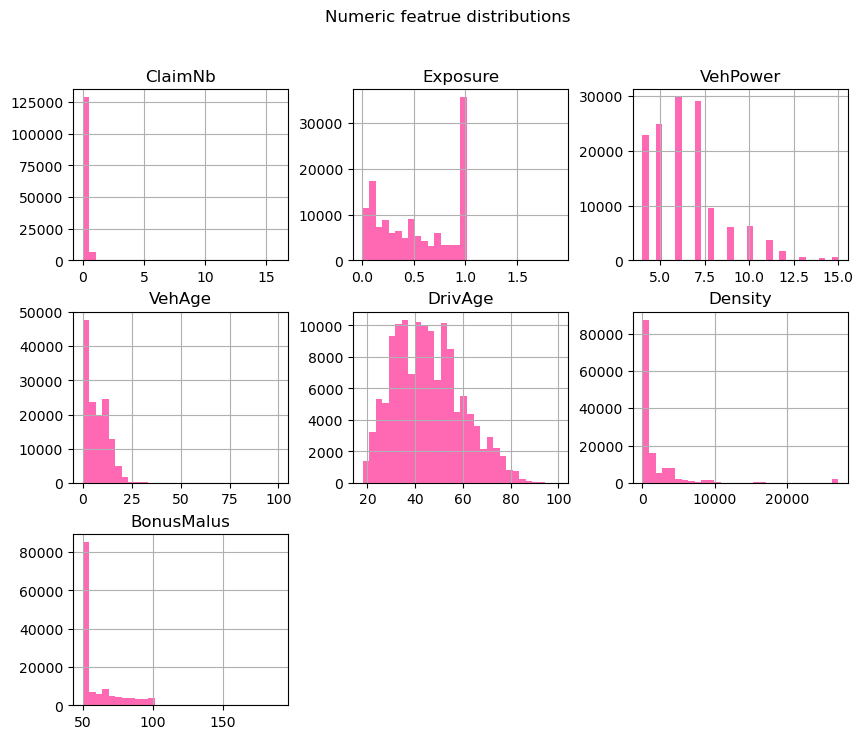

In [6]:
#we check how these values look like, the ranges, and the shape they have, this is really useful ngl

numeric_cols = ['ClaimNb', 'Exposure', 'VehPower', 'VehAge', 'DrivAge', 'Density', 'BonusMalus']
data[numeric_cols].hist(bins=30, figsize=(10,8), color = 'hotpink')
plt.suptitle("Numeric featrue distributions")
plt.show()


In [7]:
# With this we check for absurd/ extreme values in these variables
data[(data['Exposure'] <= 0) | (data['Exposure'] > 1)]
data[(data['DrivAge'] < 18) | (data['DrivAge'] > 100)]
#we can se that there are no extreme values in these columns

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region


In [8]:
#here we check the categories from the variables VehBrand, VehGas, Area and Region

categorical_cols = ['VehBrand', 'VehGas', 'Area', 'Region']
for col in categorical_cols:
    print(f"\n{col} unique values:", data[col].unique())
    print(f"{col} value counts:\n", data[col].value_counts())


VehBrand unique values: ['B1' 'B12' 'B2' 'B5' 'B4' 'B14' 'B3' 'B6' 'B10' 'B11' 'B13']
VehBrand value counts:
 VehBrand
B12    33193
B1     32480
B2     32040
B3     10713
B5      6903
B6      5794
B4      4993
B10     3487
B11     2696
B13     2498
B14      806
Name: count, dtype: int64

VehGas unique values: ['Regular' 'Diesel']
VehGas value counts:
 VehGas
Regular    69154
Diesel     66449
Name: count, dtype: int64

Area unique values: ['E' 'D' 'C' 'B' 'A' 'F']
Area value counts:
 Area
C    38593
D    30361
E    27256
A    20807
B    15036
F     3550
Name: count, dtype: int64

Region unique values: ['R24' 'R11' 'R73' 'R93' 'R53' 'R41' 'R91' 'R52' 'R82' 'R21' 'R22' 'R72'
 'R31' 'R83' 'R54' 'R23' 'R25' 'R26' 'R74' 'R94' 'R42' 'R43']
Region value counts:
 Region
R24    32099
R82    16980
R93    15798
R11    13807
R53     8479
R52     7809
R91     7083
R72     6364
R31     5472
R54     3820
R73     3411
R41     2614
R25     2185
R26     2136
R23     1748
R22     1597
R83     1045
R94   

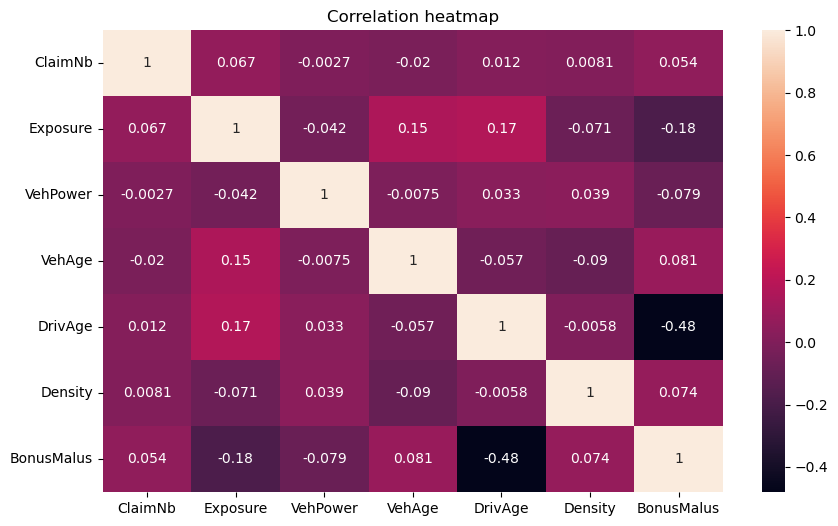

In [9]:
#With this graph we get to see what variables are correlated and how correlated

plt.figure(figsize=(10,6))
sns.heatmap(data[numeric_cols].corr(), annot=True)
plt.title("Correlation heatmap")
plt.show()

#we see that barely any variables are somewhat correlated, still, 0.17 is very little correlation imo

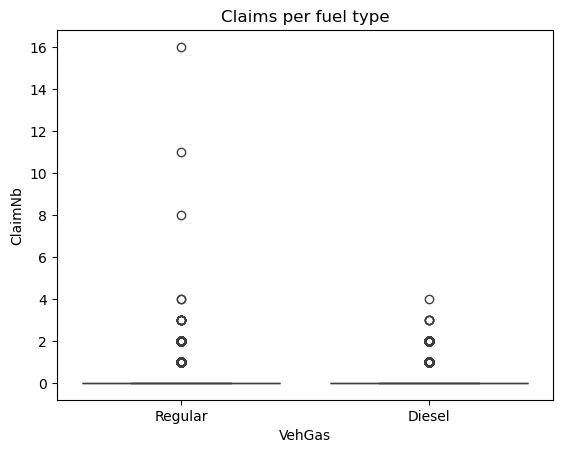

In [10]:
sns.boxplot(x='VehGas', y='ClaimNb', data=data)
plt.title("Claims per fuel type")
plt.show()

After this initial contatc with the data, we can start analisyng it. 

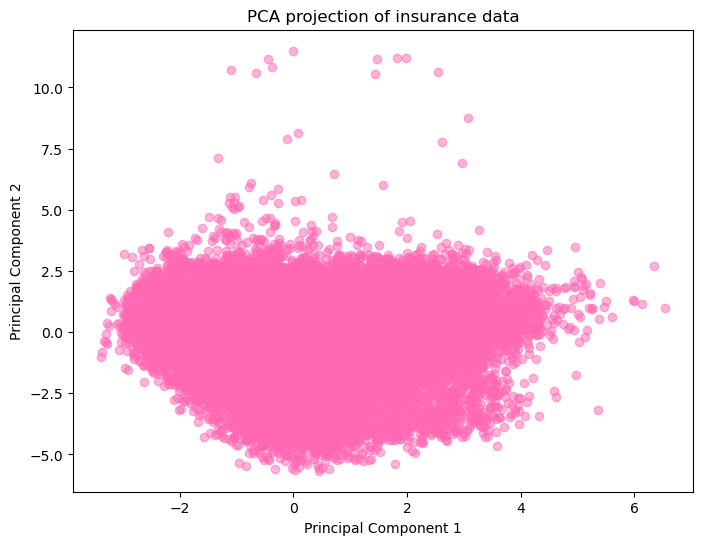

In [11]:
numeric_cols = ['ClaimNb', 'Exposure', 'VehPower', 'VehAge', 'DrivAge', 'Density', 'BonusMalus']

X = data[numeric_cols]

# Scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, color='hotpink')
plt.title("PCA projection of insurance data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

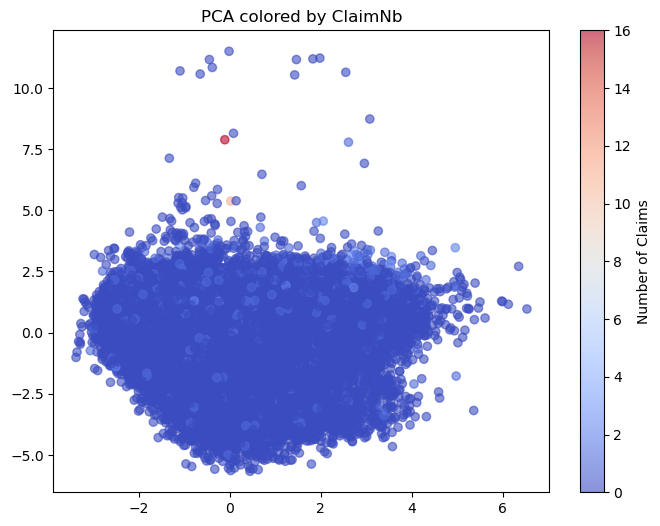

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=data['ClaimNb'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Number of Claims')
plt.title("PCA colored by ClaimNb")
plt.show()

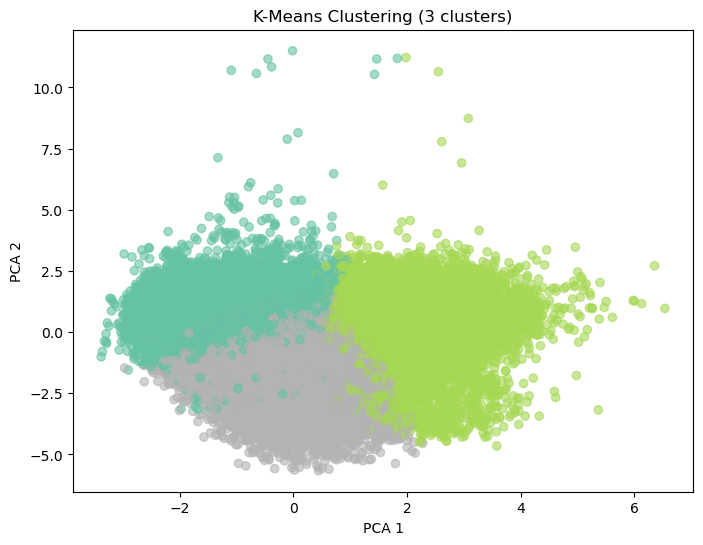

In [13]:
# Try 3 clusters (you can experiment with 2–5)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to your dataframe
data['Cluster'] = clusters

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='Set2', alpha=0.6)
plt.title("K-Means Clustering (3 clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()